## <b>Bank Churn prediction



### **Context**:

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### **Objective**:

Let us consider you are working as Data scientist with the  bank and you need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### **Data Dictionary**:

The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features as follows:

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer

CreditScore: It defines the credit history of the customer.
  
Geography: A customer’s location
   
Gender: It defines the Gender of the customer
   
Age: Age of the customer
    
Tenure: Number of years for which the customer has been with the bank

NumOfProducts: refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

EstimatedSalary: Estimated salary

isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

Exited : whether or not the customer left the bank within six month. It can take two values

0=No ( Customer did not leave the bank )
1=Yes ( Customer left the bank )

### Importing necessary libraries

In [1]:
# for reading, manipulating, and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scikit learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# tensorflow/keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend
import random

# suppress version warnings
import warnings
warnings.filterwarnings('ignore')

from keras import callbacks
from keras.callbacks import ModelCheckpoint


<b> Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIML Intro to NNs/Bank Churn Project/Churn.csv')

### Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


'Exited' is the target value,

0=No ( Customer did not leave the bank ) 1=Yes ( Customer left the bank )

I expect RowNumber, CustomerID and Surname to be removed in pre-processing as they should not have an influence on the model.

Will conduct EDA and drop any other features that do not seem to have an impact on the prediction.

#### Checking the shape of the dataset

In [ ]:
data.shape

(10000, 14)

#### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Most features are numeric, expect to have to scale/normalize thier values to have a non-biased effect on the model.

There are several object dtypes that will have to be encoded, if ordinal, or OHE if nominal.

All features have 10000 entries, which matches the shape[0], so expect no missing data.

#### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

There are no duplicate records


#### Checking for missing values

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

#### Drop the columns which are unique for all users

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


unique columns have been removed, also removed 'Surname' because it should be irrelevent and should be removed to maintain non-biased analysis and modeling.

#### Check the statistical summary

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


The numerical features are on vastly different numerical scales.  Will scale the data after splitting it.

## Exploratory Data Analysis


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the target feature related to each categorical feature?
2. How is the target feature related to each numerical feature?
3. How are the features correlated to each other?
4. How does the distribution vary for each feature?

#### Define functions to create custom charts

In [ ]:
# Function to plot a boxplot and a histogram along the same scale, for numerical features.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots for categorical features


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### Function to plot distributions
# distribution_plot_wrt_target


def dwrt(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###Univariate Analysis

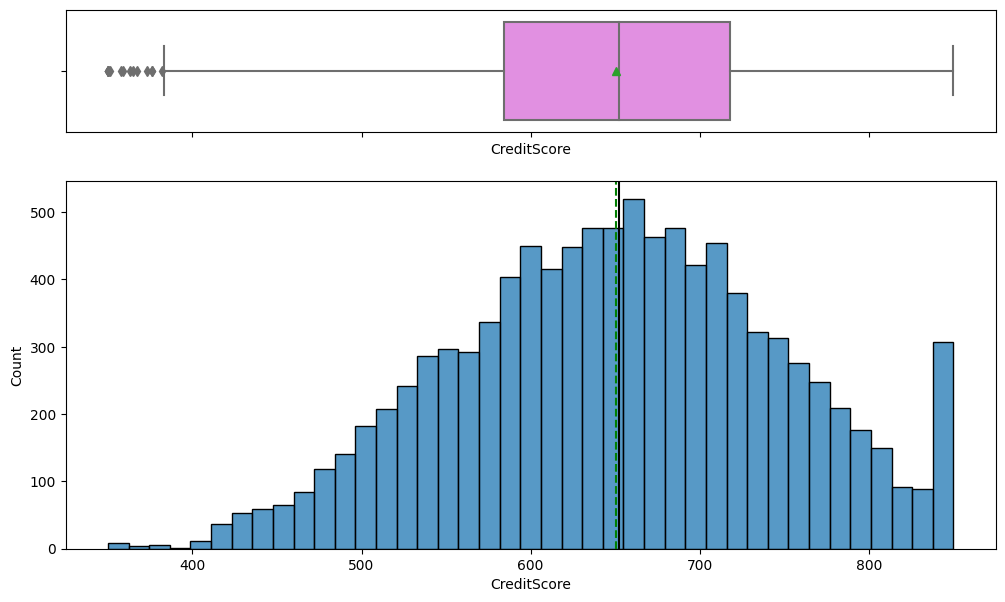

In [ ]:
histogram_boxplot(df, 'CreditScore')

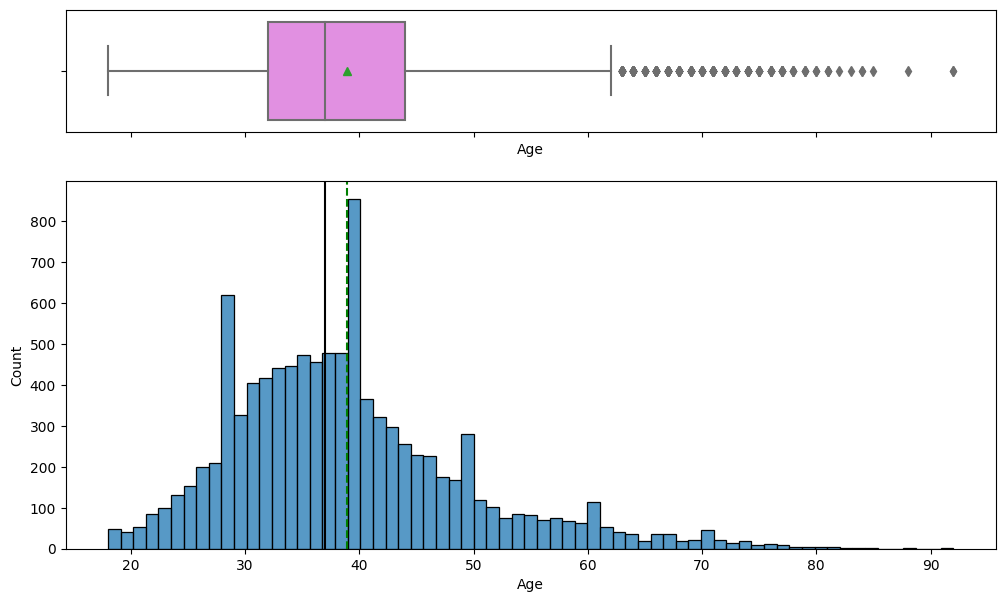

In [ ]:
histogram_boxplot(df, 'Age')

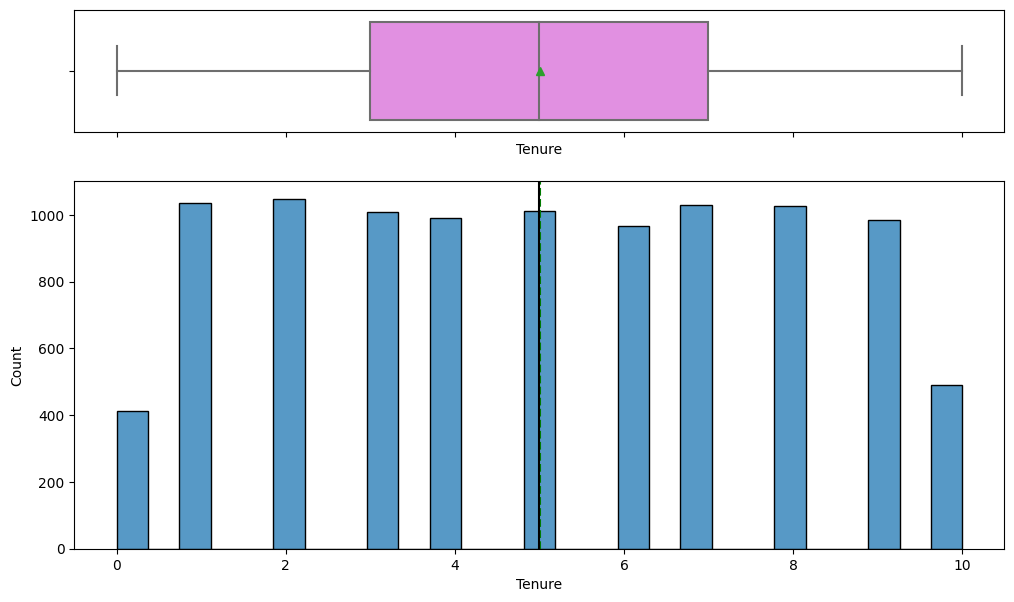

In [ ]:
histogram_boxplot(df, 'Tenure')

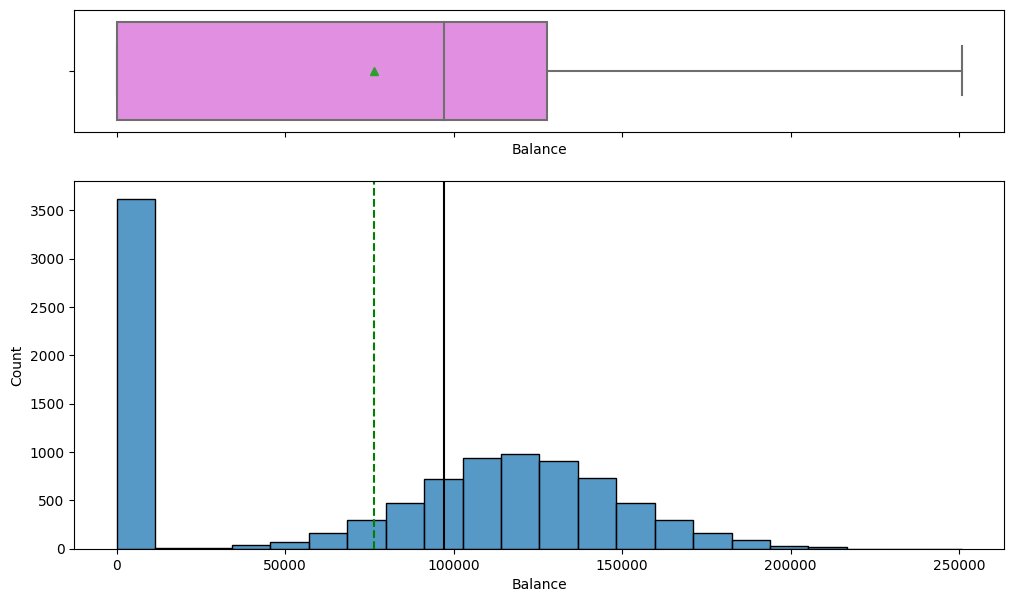

In [ ]:
histogram_boxplot(df, 'Balance')

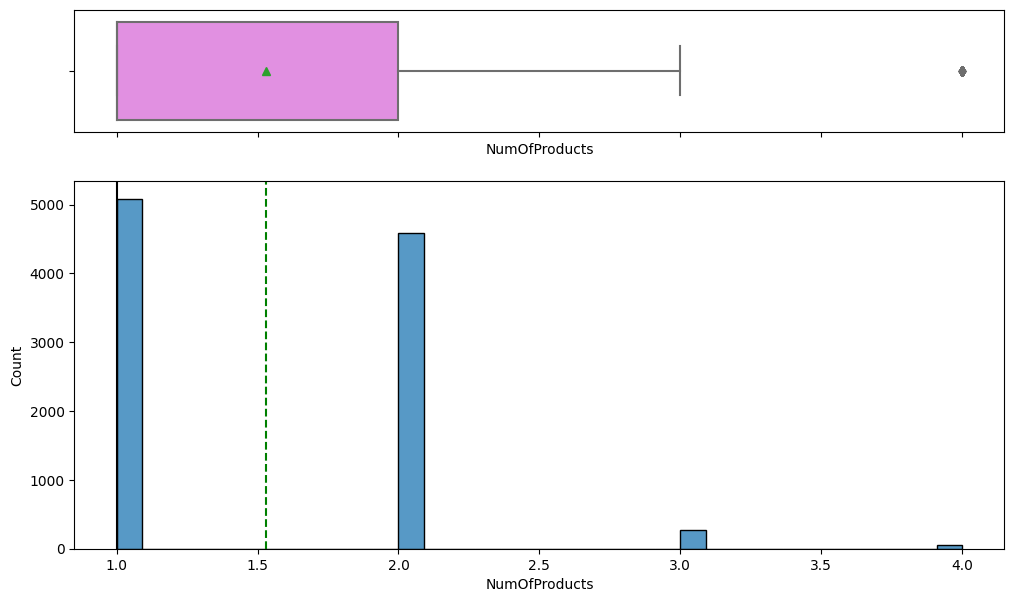

In [ ]:
histogram_boxplot(df, 'NumOfProducts')

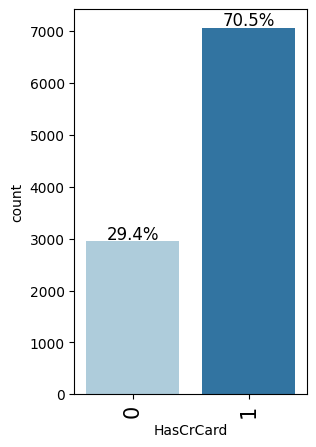

In [ ]:
labeled_barplot(df, 'HasCrCard', perc=True);

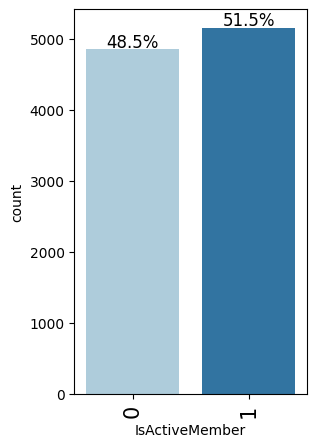

In [ ]:
labeled_barplot(df, 'IsActiveMember', perc=True);

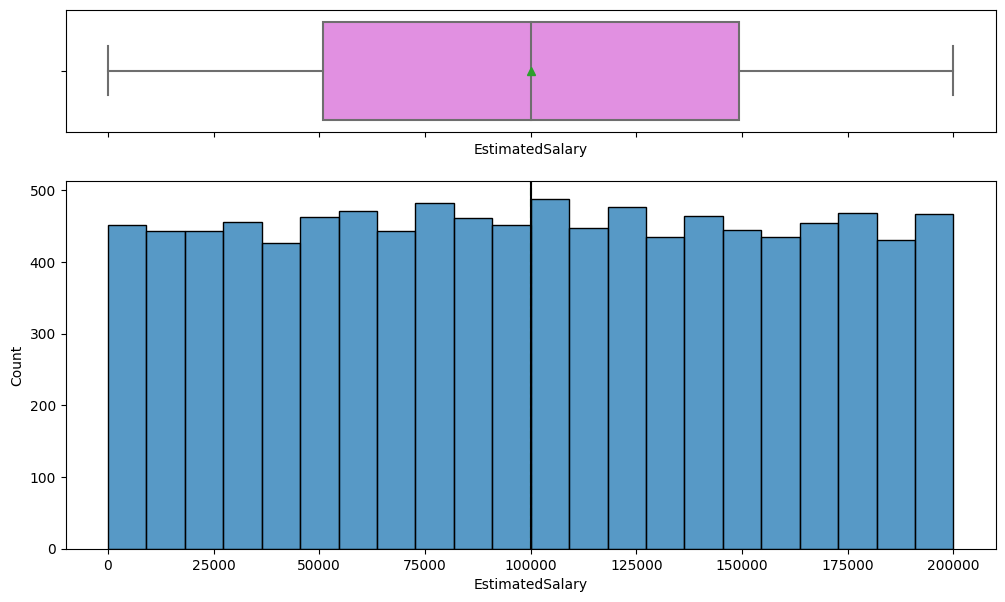

In [ ]:
histogram_boxplot(df, 'EstimatedSalary')

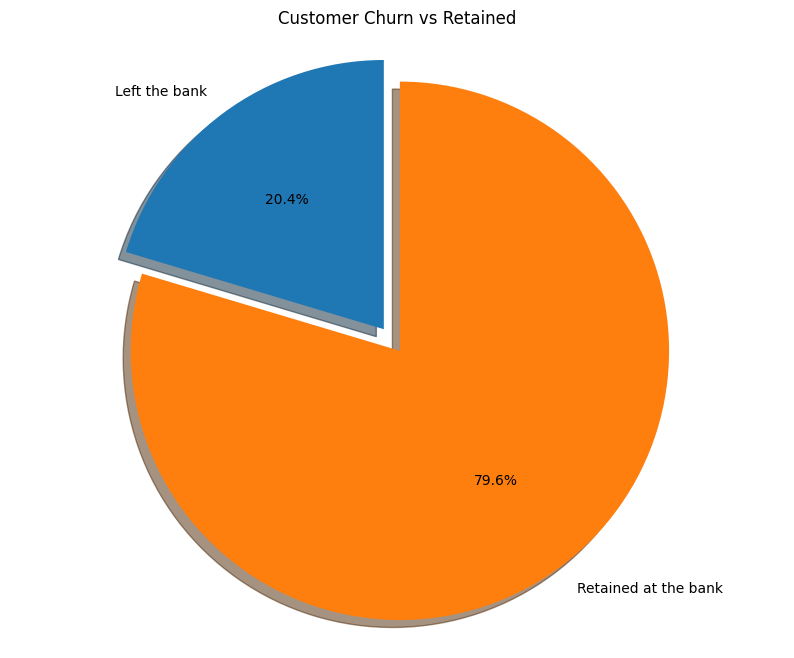

In [ ]:
# visualize the the target variable
labels = 'Left the bank', 'Retained at the bank'
sizes = [df['Exited'][df['Exited']==1].count(), df['Exited'][df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Customer Churn vs Retained')
plt.show()

In [ ]:
print('Percentages of target variable:\n0-retained \n1-churned out of the bank:\n')
df['Exited'].value_counts(1) *100

Percentages of target variable:
0-retained 
1-churned out of the bank:



0    79.63
1    20.37
Name: Exited, dtype: float64

This target variable is not balanced.  Through the model training and evaluation process, may consider oversampling/undersampling

### Bivariate Analysis

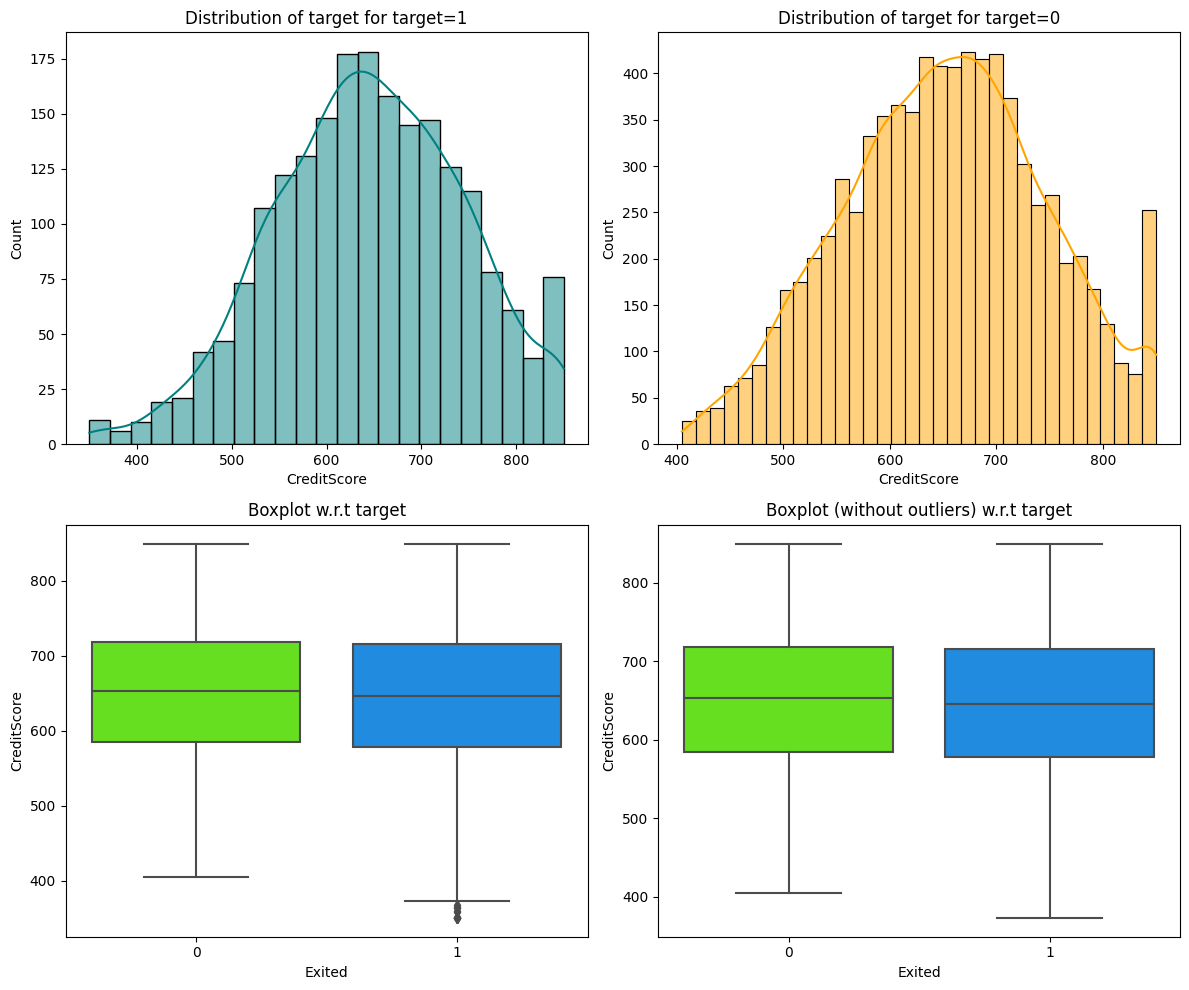

In [ ]:
dwrt(df, 'CreditScore', 'Exited')

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


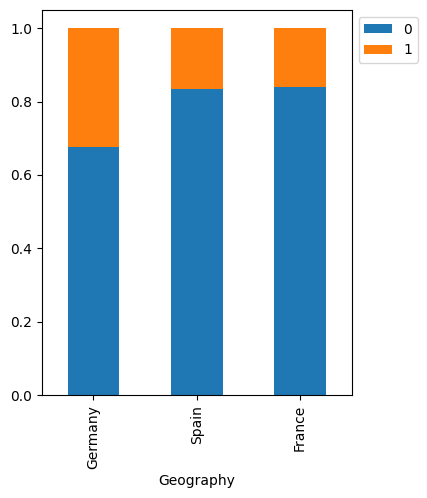

In [ ]:
stacked_barplot(df, 'Geography', 'Exited')

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


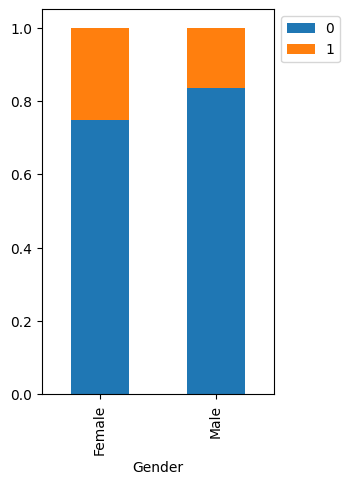

In [ ]:
stacked_barplot(df, 'Gender', 'Exited')

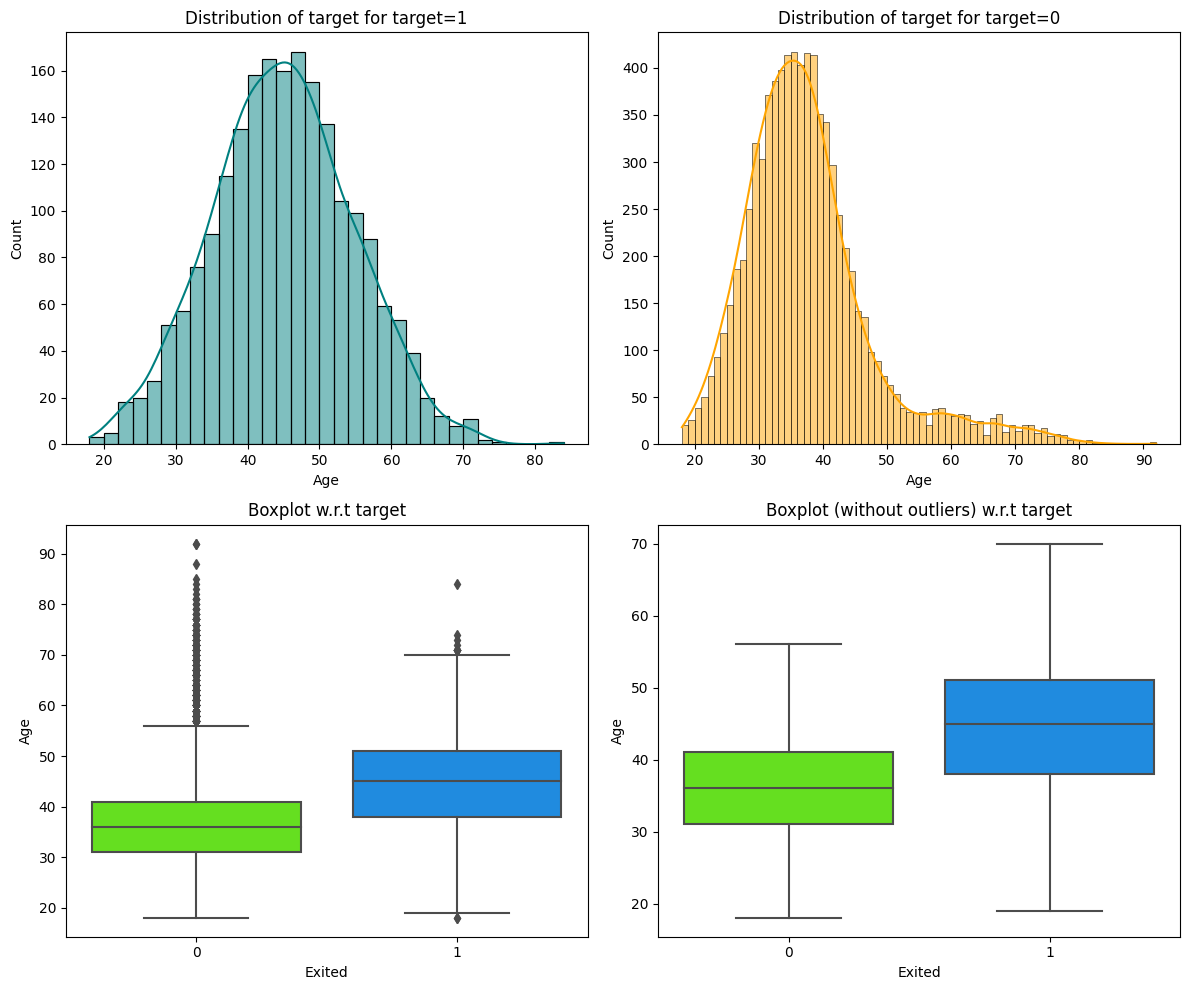

In [ ]:
dwrt(df, 'Age', 'Exited')

The outliers go range from 19 years old to 90 years old.  These are realistic ages and will be kept.

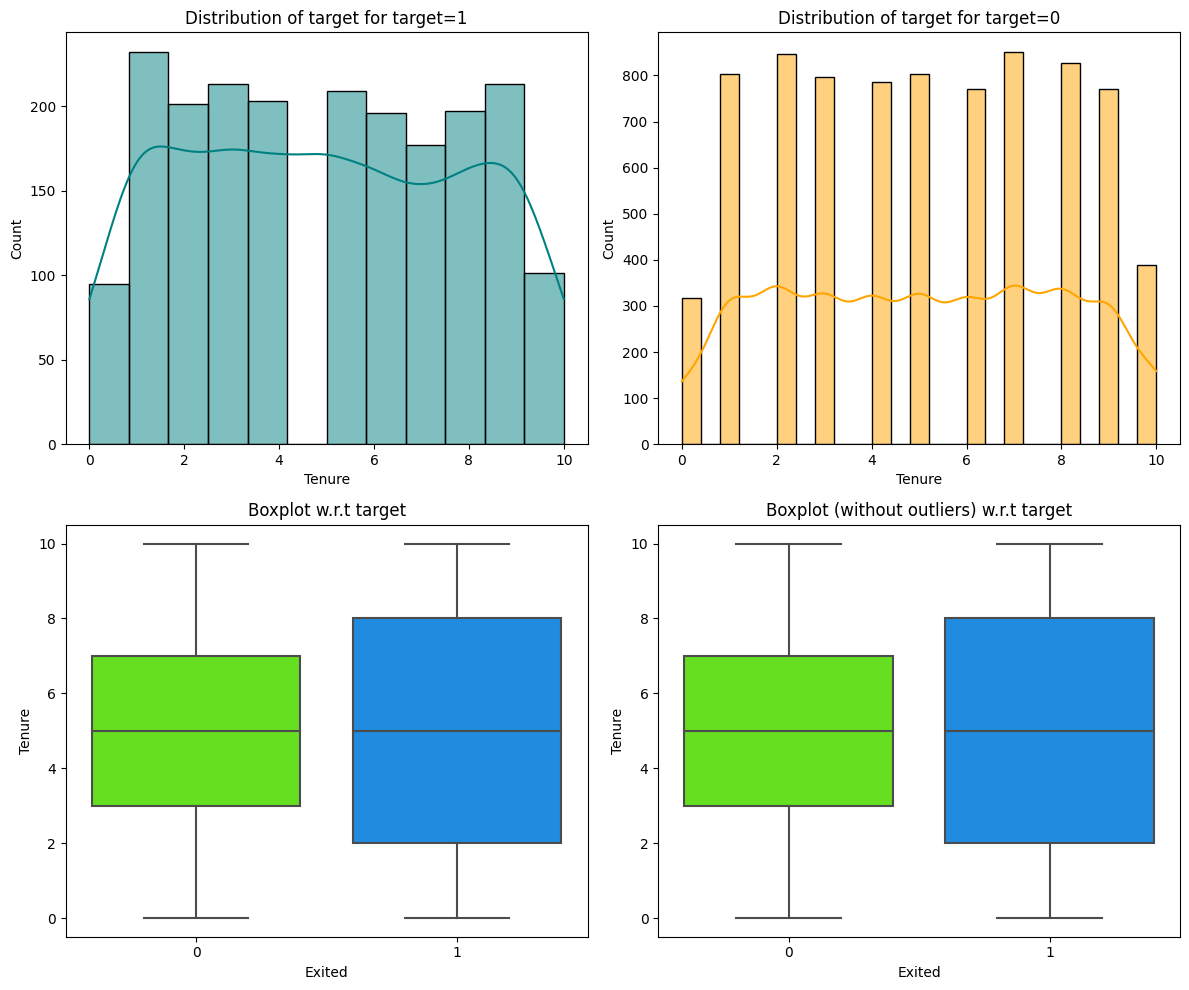

In [ ]:
dwrt(df, 'Tenure', 'Exited')

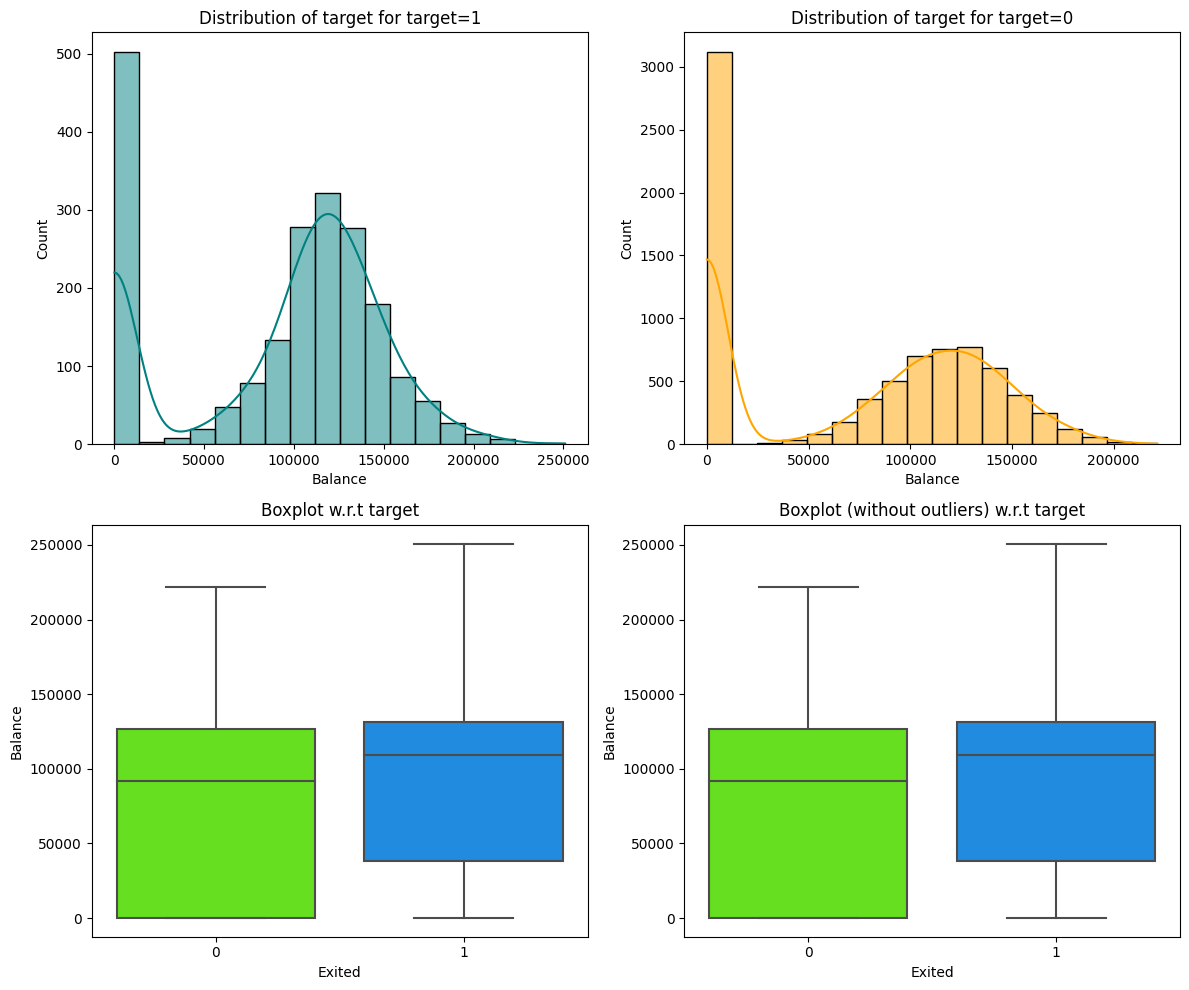

In [ ]:
dwrt(df, 'Balance', 'Exited')

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


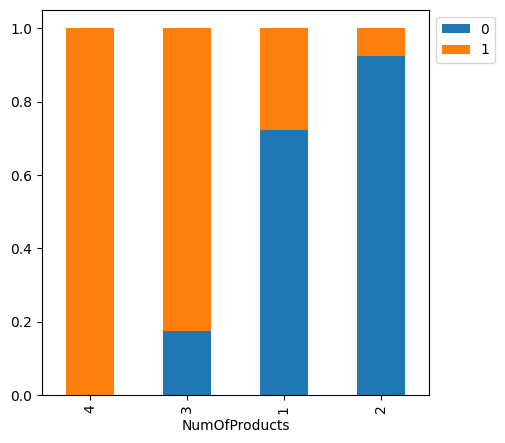

In [ ]:
stacked_barplot(df, 'NumOfProducts', 'Exited')

Interestingly, all 60 people with 4 products left the bank.  This indicates that clients with 4 accounts may be unhappy, why...?

Those with 2 have the best retention rate.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


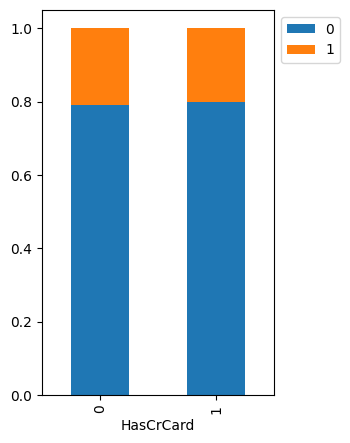

In [ ]:
stacked_barplot(df, 'HasCrCard', 'Exited')

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


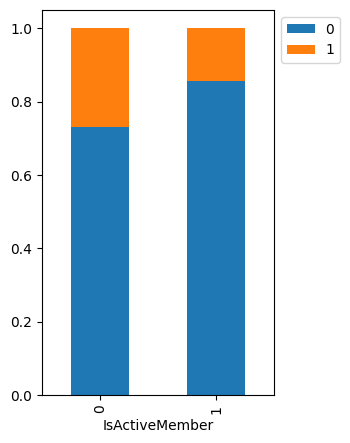

In [ ]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

Active members are less likely to leave the bank.  Presumably, some customers who are not really using the services regularily, decide to close their accounts and leave.  Recommend driving customer use/interaction with the bank and their accounts.

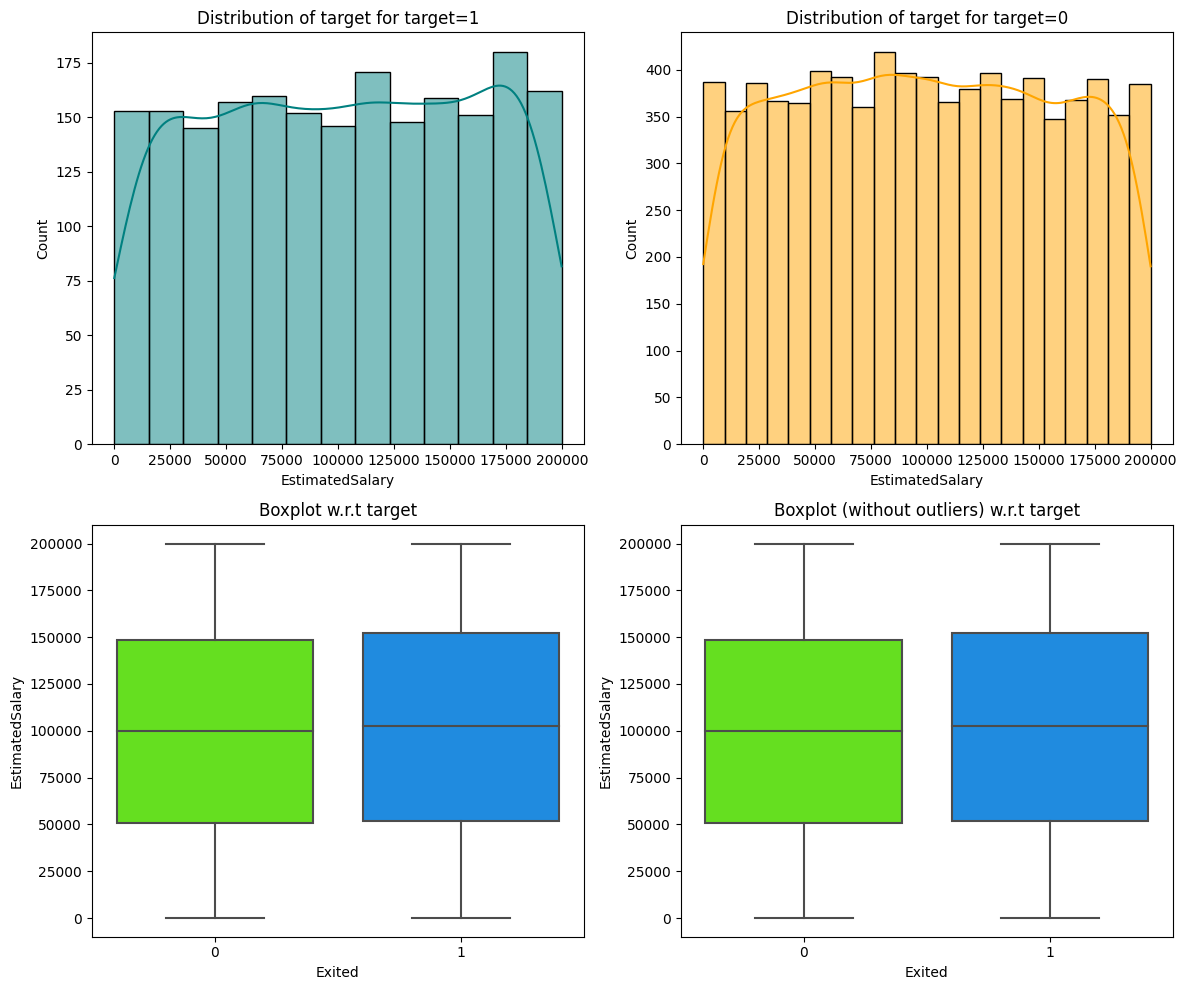

In [ ]:
dwrt(df, 'EstimatedSalary', 'Exited')

Estimated Salary is evenly distributed, and has virtually no difference between those who left and those who stayed with the bank.

'CreditScore','HasCrCard', 'EstimatedSalary' all have nearly identical distributions and central tendencies on both categories of the target variable.

Therefore, will drop these three as they have little/no impact to the prediction.

In [ ]:
df.drop(['CreditScore','HasCrCard', 'EstimatedSalary'], axis=1, inplace=True)

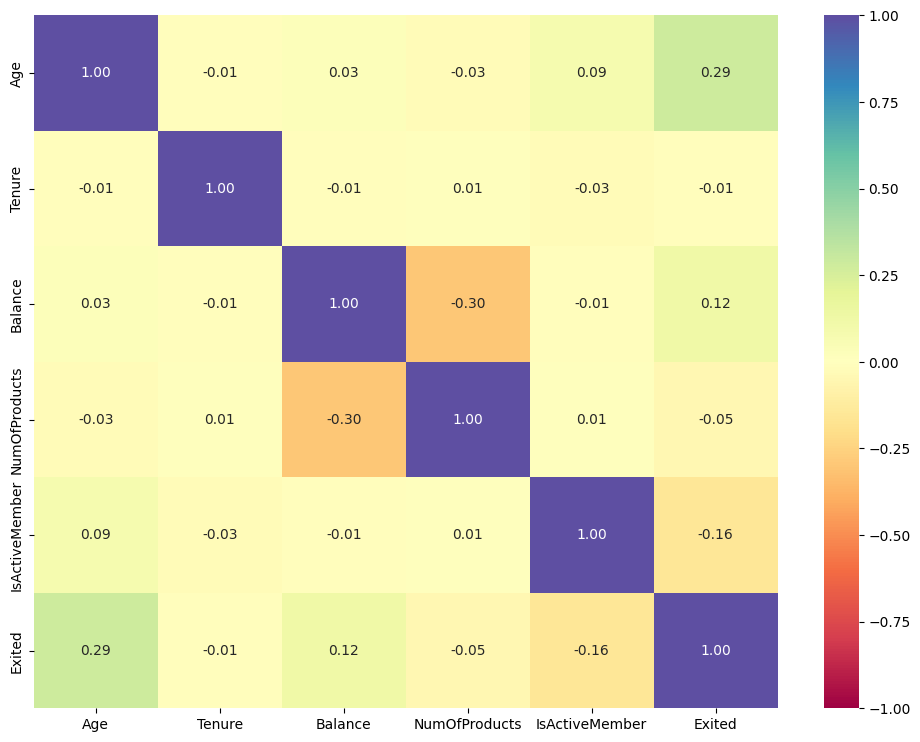

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='Spectral');

There is little to no correlation between the features.

I will check the original, complete, dataset 'data' just to see if there was any correlation including the dropped features

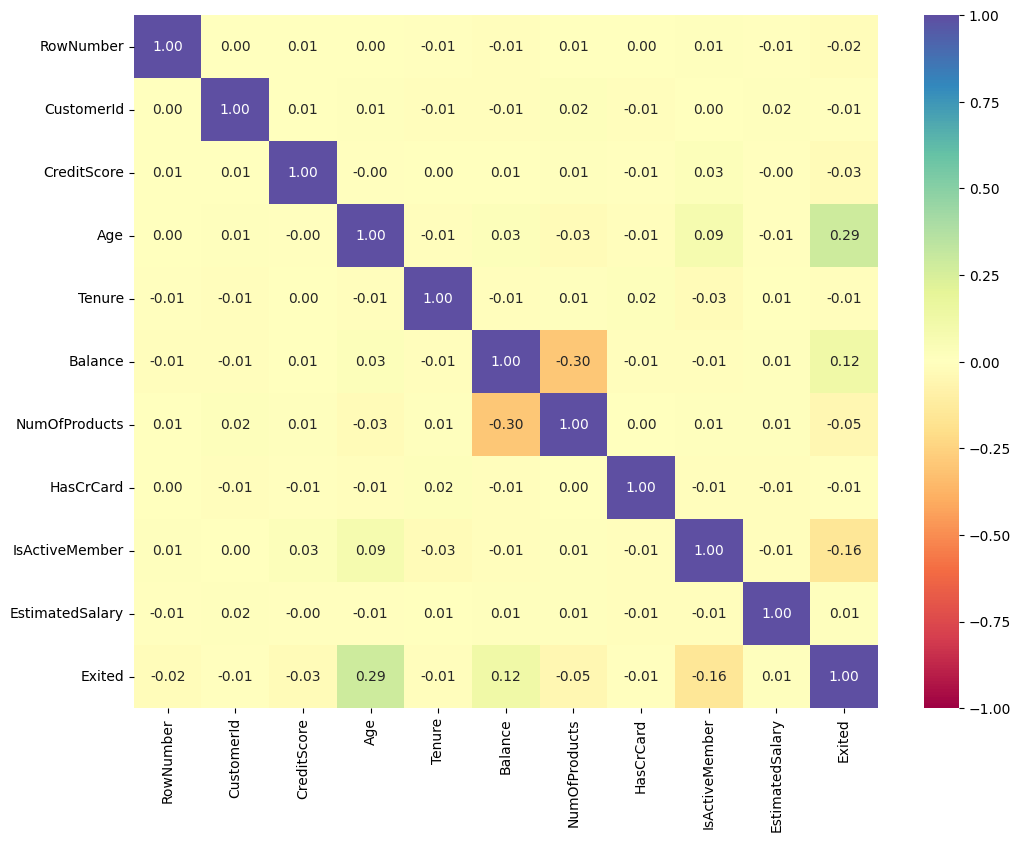

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='Spectral');

In [ ]:
df.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,France,Female,42,2,0.00,1,1,1
1,Spain,Female,41,1,83807.86,1,1,0
2,France,Female,42,8,159660.80,3,0,1
3,France,Female,39,1,0.00,2,0,0
4,Spain,Female,43,2,125510.82,1,1,0


## Data Preparation for modeling

- The Objective is to predict the churn.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance

### Separate the Features and the Target Variable

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
print(X.shape)
print(y.shape)

(10000, 7)
(10000,)


### split the data into train, validation, and test sets

In [ ]:
# split into temp(for train and val) and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6400, 7)
(1600, 7)
(2000, 7)
(6400,)
(1600,)
(2000,)


### encode the categorical variables of Geography and Gender

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_train.head()

,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
5292,28,6,0.00,2,0,0,0,0
3879,33,9,151772.63,2,0,0,0,0
6118,49,5,167962.70,1,0,0,0,0
4044,32,8,0.00,1,1,0,0,1
3202,33,4,135946.26,1,0,0,0,0


Categorical features have been OHE.

Now will scale the numerical data

### Scale the numerical data with StandardScaler

This will scale the numerical features so they all have a mean of 0 and a std dev of 1.  Standard score or z-score (x-mean)/std dev

In [ ]:
# get the names of the columns to scale
num_cols = X_train.select_dtypes(include=['int64', 'float64'])

In [ ]:
# get the names of the columns to scale
num_cols.columns

Index(['Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember'], dtype='object')

Will not scale 'IsActiveMember' as it is a binary, 0 or 1 feature.  Will scale teh others numerical columns.

In [ ]:
# fit the scaler on the train data
scaler = StandardScaler()
temp = scaler.fit(X_train[['Age', 'Tenure', 'Balance', 'NumOfProducts']])

In [ ]:
X_train[['Age', 'Tenure', 'Balance', 'NumOfProducts']] = temp.transform(X_train[['Age', 'Tenure', 'Balance', 'NumOfProducts']])
X_val[['Age', 'Tenure', 'Balance', 'NumOfProducts']] = temp.transform(X_val[['Age', 'Tenure', 'Balance', 'NumOfProducts']])
X_test[['Age', 'Tenure', 'Balance', 'NumOfProducts']] = temp.transform(X_test[['Age', 'Tenure', 'Balance', 'NumOfProducts']])

In [ ]:
X_train.head()

,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
5292,-1.047381,0.347046,-1.212523,0.796050,0,0,0,0
3879,-0.572048,1.377238,1.214872,0.796050,0,0,0,0
6118,0.949016,0.003649,1.473810,-0.912441,0,0,0,0
4044,-0.667115,1.033841,-1.212523,-0.912441,1,0,0,1
3202,-0.572048,-0.339749,0.961751,-0.912441,0,0,0,0


Categorical features have been encoded.

Numerical features have been scaled.


## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

### Which case is more important?
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

### How to reduce this loss i.e need to reduce False Negative?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

## Initialize & Build the model

#### Clearing the backend session and initializing the random seed values

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

#### Build the first model with RMSprop Optimizer

In [ ]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=8))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
# fit the model, added early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
history1 = model1.fit(X_train, y_train, validation_split=0.2,
                      epochs=100, batch_size=32,callbacks=es_cb)

Epoch 1/100
160/160 [==============================] - 4s 10ms/step - loss: 0.4665 - recall: 0.0887 - val_loss: 0.4201 - val_recall: 0.2446
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.3861 - recall: 0.3031 - val_loss: 0.3791 - val_recall: 0.4460
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.3614 - recall: 0.3957 - val_loss: 0.3580 - val_recall: 0.4820
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.3489 - recall: 0.4464 - val_loss: 0.3493 - val_recall: 0.5000
Epoch 5/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3434 - recall: 0.4513 - val_loss: 0.3463 - val_recall: 0.4496
Epoch 6/100
160/160 [==============================] - 1s 7ms/step - loss: 0.3404 - recall: 0.4610 - val_loss: 0.3404 - val_recall: 0.4784
Epoch 7/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3368 - recall: 0.4669 - val_loss: 0.3411 - val_recall: 0.5252
Epoch 8/100
160/160 [=====

### Obtaining the train and validation losses

50/50 [==============================] - 0s 3ms/step - loss: 0.3457 - recall: 0.4233
[0.34566810727119446, 0.42331287264823914]


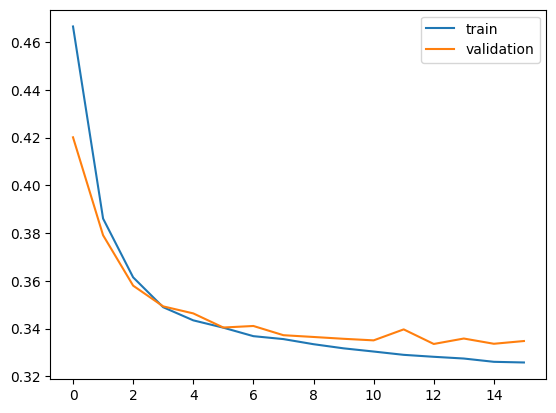

In [ ]:
# capture the learning history per epoch
hist = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# plot the accuracy at each epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'validation'), loc=0)

results = model1.evaluate(X_val, y_val)
print(results)

This model appears to slightly overfit, as seen by the reduction in loss on the training set,compared to the validation set.

#### Let's Plot confusion matrix

##### Define a confusion matrix function

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

##### Create the confusion matrix

In [ ]:
y_pred1 = model1.predict(X_val)
y_pred1 = (y_pred1 >0.5)

50/50 [==============================] - 0s 2ms/step


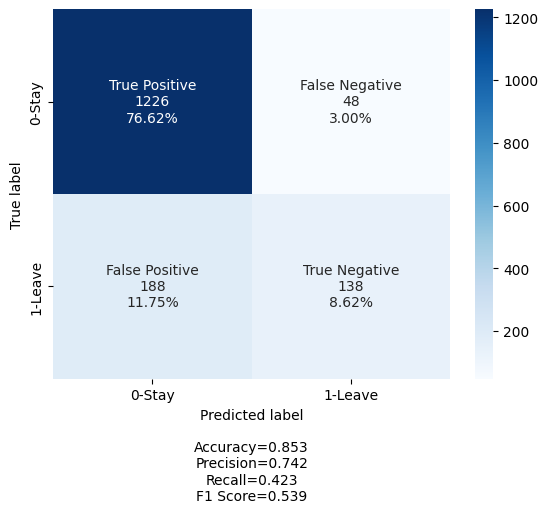

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred1)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

The recall score is pretty low, I expect this has to do with setting the threshold a 0.5.  I will determine the optimal threshold utilizing the ROC-AUC score and see if there is any improvement.

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.161824, G-Mean=0.793


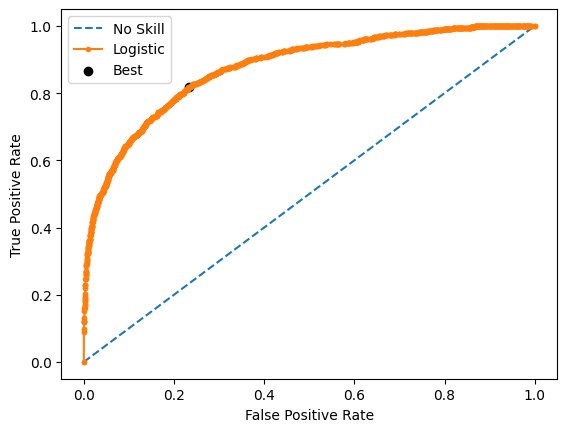

In [ ]:
from sklearn.metrics import roc_curve
# predict probabilities
yhat = model1.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred1 = model1.predict(X_val)
y_pred1 = (y_pred1 >thresholds[ix])

50/50 [==============================] - 0s 2ms/step


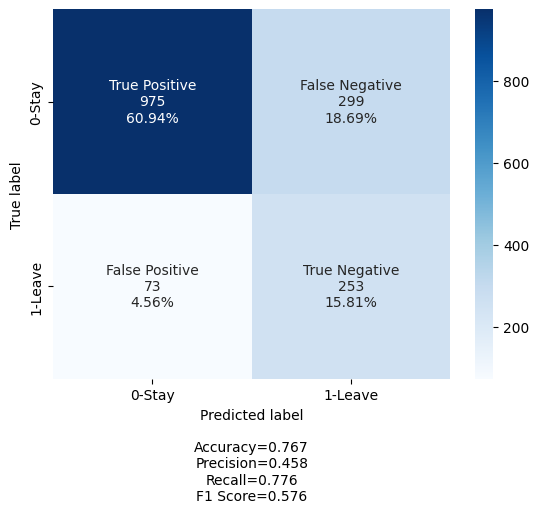

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred1)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

Utilizing ROC-AUC curve has greatly improved recall.  Will continue further models with optimzed threshold

### Building second model with SGD Optimizer

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_dim=8))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
# fit the model, added early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
history2 = model2.fit(X_train, y_train, validation_split=0.2,
                      epochs=100, batch_size=32,callbacks=es_cb)

Epoch 1/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5891 - recall: 0.1189 - val_loss: 0.5273 - val_recall: 0.0000e+00
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4878 - recall: 0.0000e+00 - val_loss: 0.4927 - val_recall: 0.0000e+00
Epoch 3/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4622 - recall: 0.0000e+00 - val_loss: 0.4752 - val_recall: 0.0000e+00
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4470 - recall: 0.0058 - val_loss: 0.4620 - val_recall: 0.0108
Epoch 5/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4359 - recall: 0.0224 - val_loss: 0.4515 - val_recall: 0.0324
Epoch 6/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4273 - recall: 0.0634 - val_loss: 0.4431 - val_recall: 0.0683
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4202 - recall: 0.0936 - val_loss: 0.4362 - val_recall: 0.0935
Epoch 8

50/50 [==============================] - 0s 3ms/step - loss: 0.3547 - recall: 0.3712
[0.3547452986240387, 0.3711656332015991]


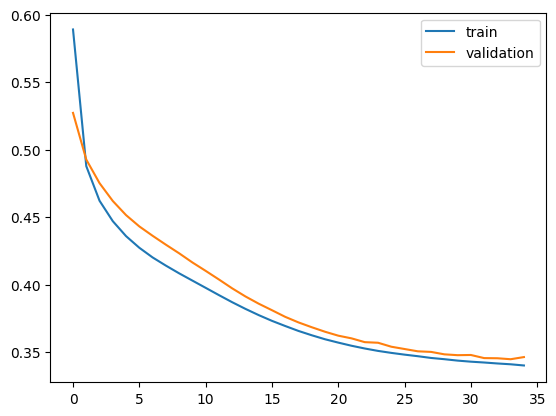

In [ ]:
# capture the learning history per epoch
hist = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# plot the accuracy at each epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'validation'), loc=0)

results = model2.evaluate(X_val, y_val)
print(results)

Model 2 seems to generalize the fit better than the first model. The loss on the train and validation sets follow each other nicely.

200/200 [==============================] - 1s 2ms/step
Best Threshold=0.177419, G-Mean=0.781


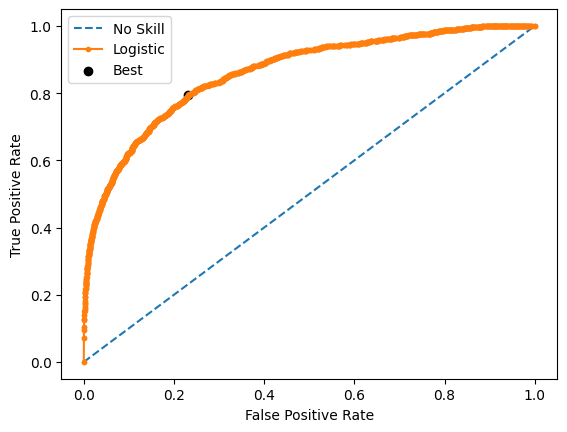

In [ ]:
# predict probabilities
yhat = model2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred2 = model2.predict(X_val)
y_pred2 = (y_pred2 >thresholds[ix])

50/50 [==============================] - 0s 3ms/step


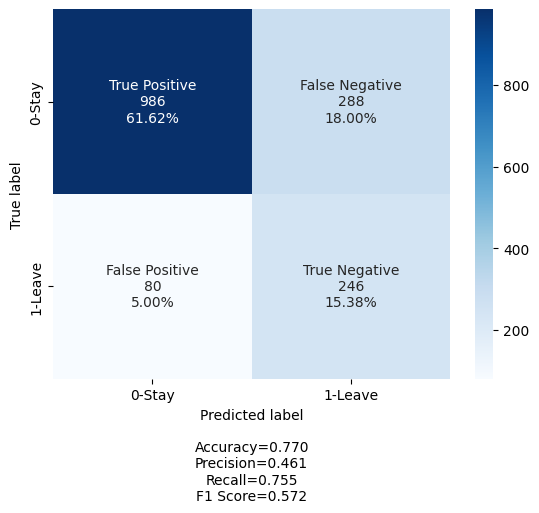

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred2)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

Using SGD, the model is not as overfit as it was using RMSprop.  

Loss is about the same, and Recall is slightly lower

Will try optimizing with Adam

### Build the third mode Adam optimizer

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_dim=8))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
# fit the model, added early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
history3 = model3.fit(X_train, y_train, validation_split=0.2,
                      epochs=100, batch_size=32,callbacks=es_cb)

Epoch 1/100
160/160 [==============================] - 2s 4ms/step - loss: 0.4828 - recall: 0.0867 - val_loss: 0.4243 - val_recall: 0.1727
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3835 - recall: 0.3041 - val_loss: 0.3720 - val_recall: 0.3885
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3557 - recall: 0.4094 - val_loss: 0.3515 - val_recall: 0.4784
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.3455 - recall: 0.4552 - val_loss: 0.3457 - val_recall: 0.5288
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3411 - recall: 0.4513 - val_loss: 0.3435 - val_recall: 0.4604
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3380 - recall: 0.4600 - val_loss: 0.3379 - val_recall: 0.4820
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3338 - recall: 0.4659 - val_loss: 0.3402 - val_recall: 0.5216
Epoch 8/100
160/160 [======

50/50 [==============================] - 0s 2ms/step - loss: 0.3526 - recall: 0.3589
[0.3525550961494446, 0.3588957190513611]


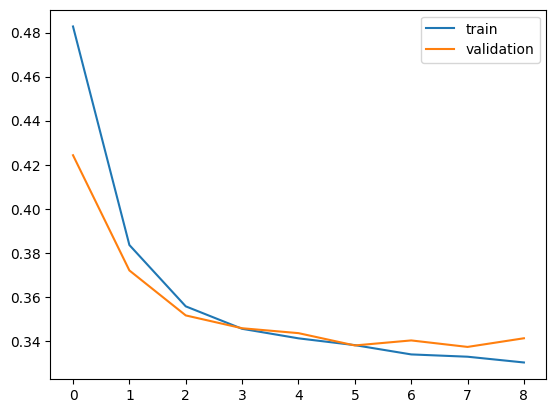

In [ ]:
# capture the learning history per epoch
hist = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch

# plot the accuracy at each epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'validation'), loc=0)

results = model3.evaluate(X_val, y_val)
print(results)

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.154108, G-Mean=0.788


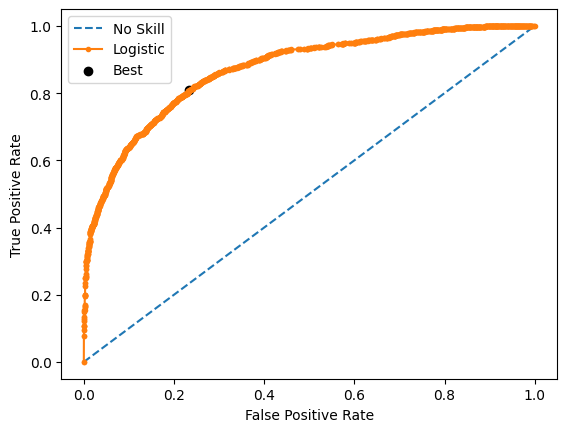

In [ ]:
# predict probabilities
yhat = model3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred3 = model3.predict(X_val)
y_pred3 = (y_pred3 >thresholds[ix])

50/50 [==============================] - 0s 2ms/step


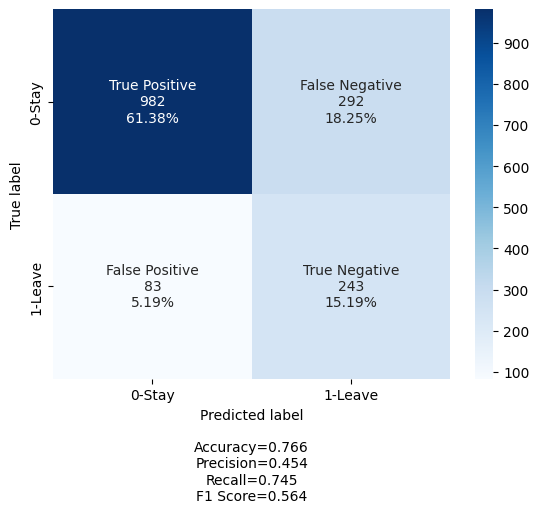

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred3)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

Using Adam optimizer, the model is slightly overfitting, but did give a slightly better recall.

SGD (model2) had a better fit, even though the recall was slightly lower.  The better fit should allow model2 to generalize better.  now will assess the ROC-AUC curve to determine the optimal threshold.

### Building Fouth model with SGD Optimizer and adding dropout

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_dim=8))
model4.add(Dropout(0.2))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
# fit the model, added early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
history4 = model4.fit(X_train, y_train, validation_split=0.2,
                      epochs=100, batch_size=32,callbacks=es_cb)

Epoch 1/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5926 - recall: 0.1491 - val_loss: 0.5297 - val_recall: 0.0000e+00
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4963 - recall: 0.0019 - val_loss: 0.4963 - val_recall: 0.0000e+00
Epoch 3/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4743 - recall: 0.0039 - val_loss: 0.4798 - val_recall: 0.0000e+00
Epoch 4/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4631 - recall: 0.0049 - val_loss: 0.4674 - val_recall: 0.0036
Epoch 5/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4514 - recall: 0.0166 - val_loss: 0.4572 - val_recall: 0.0144
Epoch 6/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4453 - recall: 0.0458 - val_loss: 0.4493 - val_recall: 0.0324
Epoch 7/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4363 - recall: 0.0478 - val_loss: 0.4425 - val_recall: 0.0432
Epoch 8/100
160

50/50 [==============================] - 0s 2ms/step - loss: 0.3519 - recall: 0.3804
[0.3519359827041626, 0.38036808371543884]


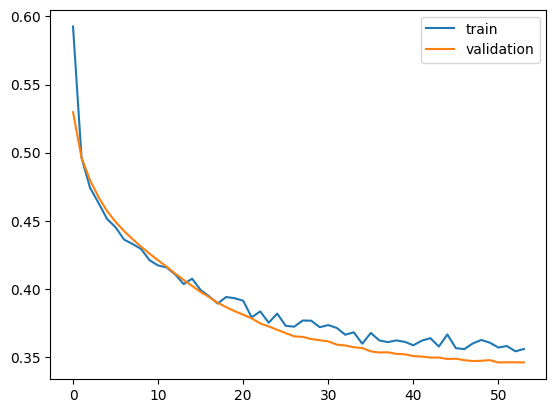

In [ ]:
# capture the learning history per epoch
hist = pd.DataFrame(history4.history)
hist['epoch'] = history4.epoch

# plot the accuracy at each epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'validation'), loc=0)

results = model4.evaluate(X_val, y_val)
print(results)

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.217319, G-Mean=0.783


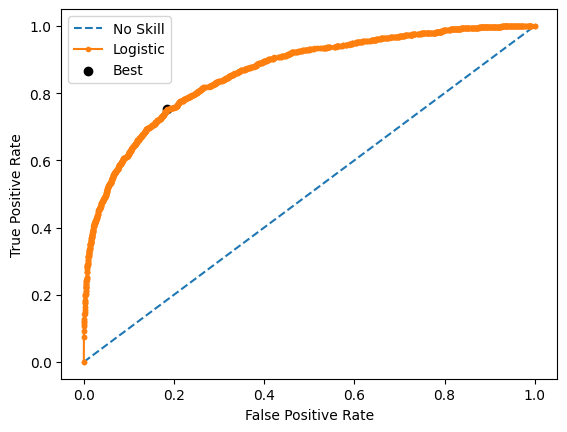

In [ ]:
# predict probabilities
yhat = model4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred4 = model4.predict(X_val)
y_pred4 = (y_pred4 >0.2) #using 0.2, max G-mean for this model was slightly worse than previous, 2 splits the difference

50/50 [==============================] - 0s 1ms/step


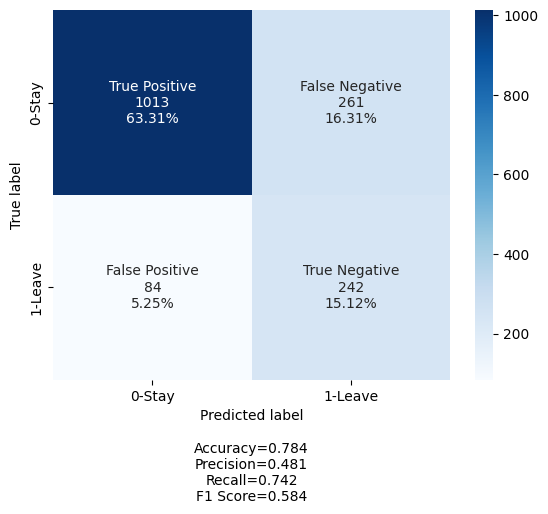

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred4)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

### Building Fifth model with SGD Optimizer and adding dropout AND batch noramlization.

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model5 = Sequential()
model5.add(Dense(64, activation='relu', input_dim=8))
model5.add(Dropout(0.2))
model5.add(Dense(32, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dense(1, activation='sigmoid'))

In [ ]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,753
Non-trainable params: 64
_____________________________________________________

In [ ]:
model5.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
# fit the model, added early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
history5 = model5.fit(X_train, y_train, validation_split=0.2,
                      epochs=100, batch_size=32,callbacks=es_cb)

Epoch 1/100
160/160 [==============================] - 3s 5ms/step - loss: 0.5795 - recall: 0.4678 - val_loss: 0.5005 - val_recall: 0.0899
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4507 - recall: 0.3616 - val_loss: 0.4281 - val_recall: 0.1799
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4211 - recall: 0.3382 - val_loss: 0.3899 - val_recall: 0.3058
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4024 - recall: 0.3421 - val_loss: 0.3691 - val_recall: 0.3705
Epoch 5/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3914 - recall: 0.3402 - val_loss: 0.3617 - val_recall: 0.3741
Epoch 6/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3881 - recall: 0.3528 - val_loss: 0.3568 - val_recall: 0.3777
Epoch 7/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3853 - recall: 0.3713 - val_loss: 0.3522 - val_recall: 0.4029
Epoch 8/100
160/160 [======

50/50 [==============================] - 0s 2ms/step - loss: 0.3482 - recall: 0.3681
[0.34819355607032776, 0.3680981695652008]


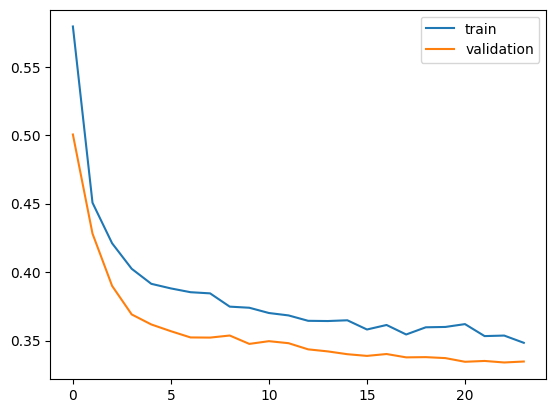

In [ ]:
# capture the learning history per epoch
hist = pd.DataFrame(history5.history)
hist['epoch'] = history5.epoch

# plot the accuracy at each epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'validation'), loc=0)

results = model5.evaluate(X_val, y_val)
print(results)

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.190548, G-Mean=0.791


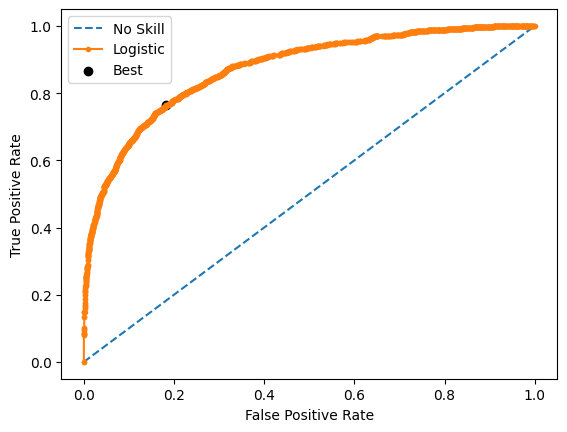

In [ ]:
# predict probabilities
yhat = model5.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred5 = model5.predict(X_val)
y_pred5 = (y_pred5 >thresholds[ix])

50/50 [==============================] - 0s 2ms/step


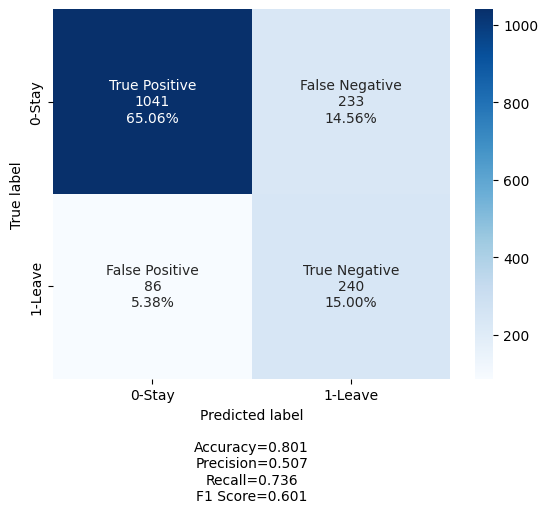

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred5)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

Model5 is the best model so far.  
  -SGD
  -Dropout
  -BatchNormalization

Now, will try some hyperparameter tuning using GridSearchCV to see if I can get improvement to Recall.

#### Hyperparameter Optimization

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

### Building a model and tuning it using hyperparameter tuning

### Dask

* There is a library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure.
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn.

Try to run the code twice if you encounter any error while improting Dask

* Dask is the same as regular Grid Search in its functioning.
* We just have to change the function from GridSearchCV to DaskGridSearchCV.

In [ ]:
!pip install dask-ml

In [ ]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
# define a function to build the model based on model5 parameters
def create_model_v5(lr,batch_size, dropout_rate):
  #backend.clear_session()
# # set the seed for random generators to ensure the same output every run
  random.seed(1)
  np.random.seed(1)
  tf.random.set_seed(1)
  model5 = Sequential()
  model5.add(Dense(64, activation='relu', input_dim=8))
  model5.add(Dropout(0.2))
  model5.add(Dense(32, activation='relu'))
  model5.add(BatchNormalization())
  model5.add(Dense(1, activation='sigmoid'))

  #compile model based on  model5
  model5.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
  return model5

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],
    'dropout_rate': [0.1, 0.2, 0.3]}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time

# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

160/160 [==============================] - 2s 5ms/step - loss: 0.5795 - accuracy: 0.7033 - val_loss: 0.5005 - val_accuracy: 0.7914
Best: 0.802344 using {'batch_size': 32, 'dropout_rate': 0.3, 'lr': 0.001}
Total runtime of the program is 210.83556461334229


##Let's create the final model with the obtained configuration after hyperparameter tuning

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model5_f = Sequential()
model5_f.add(Dense(64, activation='relu', input_dim=8))
model5_f.add(Dropout(0.1))
model5_f.add(Dense(32, activation='relu'))
model5_f.add(BatchNormalization())
model5_f.add(Dense(1, activation='sigmoid'))

#compile model based on  model5
optimizer =tf.keras.optimizers.SGD(0.001)
model5_f.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
# fit the model, added early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
history5_f = model5_f.fit(X_train, y_train, validation_split=0.2,
                      epochs=100, batch_size=32,callbacks=es_cb)

Epoch 1/100
160/160 [==============================] - 2s 6ms/step - loss: 0.5599 - recall: 0.5010 - val_loss: 0.4984 - val_recall: 0.1151
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4319 - recall: 0.3996 - val_loss: 0.4207 - val_recall: 0.2230
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3985 - recall: 0.3840 - val_loss: 0.3734 - val_recall: 0.4209
Epoch 4/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3854 - recall: 0.3811 - val_loss: 0.3563 - val_recall: 0.4532
Epoch 5/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3783 - recall: 0.3908 - val_loss: 0.3509 - val_recall: 0.4532
Epoch 6/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3739 - recall: 0.3908 - val_loss: 0.3457 - val_recall: 0.4568
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3714 - recall: 0.3977 - val_loss: 0.3465 - val_recall: 0.4424
Epoch 8/100
160/160 [======

Plotting the validation and training loss

50/50 [==============================] - 0s 2ms/step - loss: 0.3476 - recall: 0.4080
[0.3475687503814697, 0.4079754650592804]


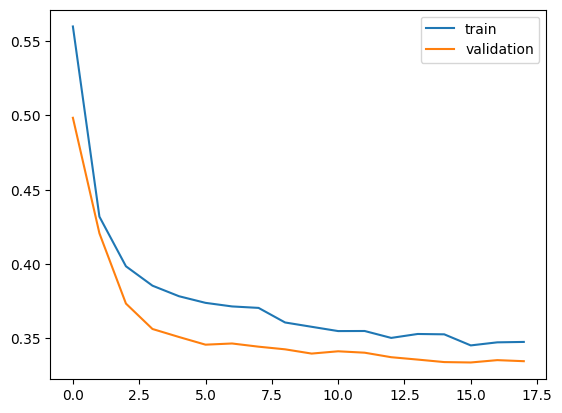

In [ ]:
# capture the learning history per epoch
hist = pd.DataFrame(history5_f.history)
hist['epoch'] = history5_f.epoch

# plot the accuracy at each epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'validation'), loc=0)

results = model5_f.evaluate(X_val, y_val)
print(results)

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.184816, G-Mean=0.790


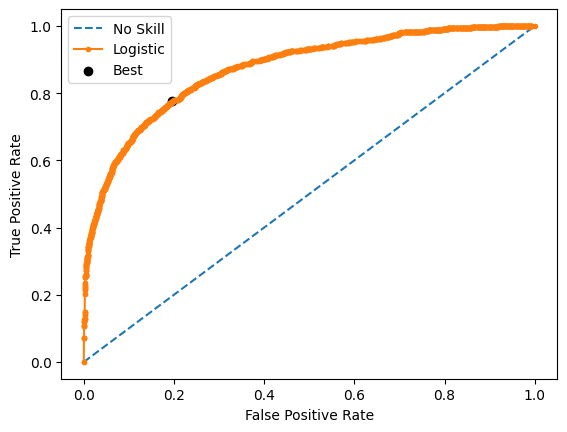

In [ ]:
# predict probabilities
yhat = model5_f.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred5_f = model5_f.predict(X_val)
y_pred5_f = (y_pred5_f >thresholds[ix])

50/50 [==============================] - 0s 2ms/step


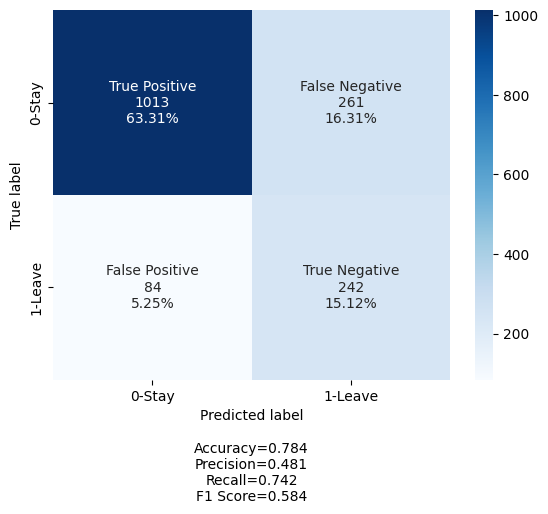

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred5_f)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

recall is slightly lower than before using gridsearch.  May go back to the original dropout of 0.2

### Keras Tuner

In [ ]:
pip install keras-tuner --upgrade

In [ ]:
import keras_tuner
from kerastuner.tuners import RandomSearch

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [ ]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

In [ ]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 3
units_0: 192
units_1: 192
learning_rate: 0.01
units_2: 32
units_3: 224
units_4: 96
units_5: 128
units_6: 64
units_7: 224
units_8: 192
units_9: 160
Score: 0.866406261920929

Trial 0 summary
Hyperparameters:
num_layers: 2
units_0: 160
units_1: 256
learning_rate: 0.001
Score: 0.8630208373069763

Trial 2 summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 160
learning_rate: 0.01
units_2: 256
units_3: 64
units_4: 160
units_5: 64
units_6: 32
units_7: 192
units_8: 160
units_9: 192
Score: 0.8609375158945719

Trial 1 summary
Hyperparameters:
num_layers: 10
units_0: 192
units_1: 32
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
Score: 0.8570312261581421

Trial 4 summary
Hyperparameters:
num_layers: 9
units_0: 96
units_1: 160
learning_rate: 0.01
units_2: 192
units_3: 96

In [ ]:
model6 = Sequential()
model6.add(Dense(192, activation='relu', input_dim=8))
model6.add(Dropout(0.1))
model6.add(Dense(192, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dense(1, activation='sigmoid'))


In [ ]:
# model6 = tuner.get_best_models()[0]


In [ ]:
optimizer=keras.optimizers.SGD(0.001)
model6.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
history6 = model6.fit(X_train, y_train, validation_split=0.2,
                      epochs=100, batch_size=32, callbacks=es_cb)

Epoch 1/100
160/160 [==============================] - 2s 7ms/step - loss: 0.5223 - recall: 0.6170 - val_loss: 0.4913 - val_recall: 0.0504
Epoch 2/100
160/160 [==============================] - 1s 9ms/step - loss: 0.4044 - recall: 0.5205 - val_loss: 0.4190 - val_recall: 0.1691
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.3716 - recall: 0.4630 - val_loss: 0.3685 - val_recall: 0.3381
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.3596 - recall: 0.4552 - val_loss: 0.3454 - val_recall: 0.4748
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.3585 - recall: 0.4396 - val_loss: 0.3513 - val_recall: 0.4424
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.3502 - recall: 0.4600 - val_loss: 0.3344 - val_recall: 0.5252
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.3510 - recall: 0.4561 - val_loss: 0.3365 - val_recall: 0.5252
Epoch 8/100
160/160 [======

Plotting the validation and training loss

50/50 [==============================] - 0s 6ms/step - loss: 0.3514 - recall: 0.4264
[0.35137036442756653, 0.42638036608695984]


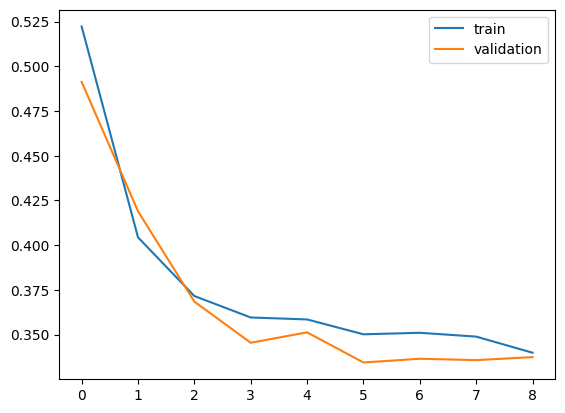

In [ ]:
# capture the learning history per epoch
hist = pd.DataFrame(history6.history)
hist['epoch'] = history6.epoch

# plot the accuracy at each epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'validation'), loc=0)

results = model6.evaluate(X_val, y_val)
print(results)

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.177398, G-Mean=0.798


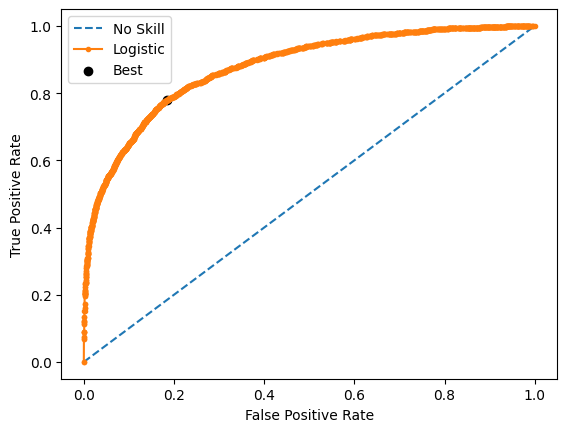

In [ ]:
# predict probabilities
yhat = model6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred6 = model6.predict(X_val)
y_pred6 = (y_pred6 >thresholds[ix])

50/50 [==============================] - 0s 2ms/step


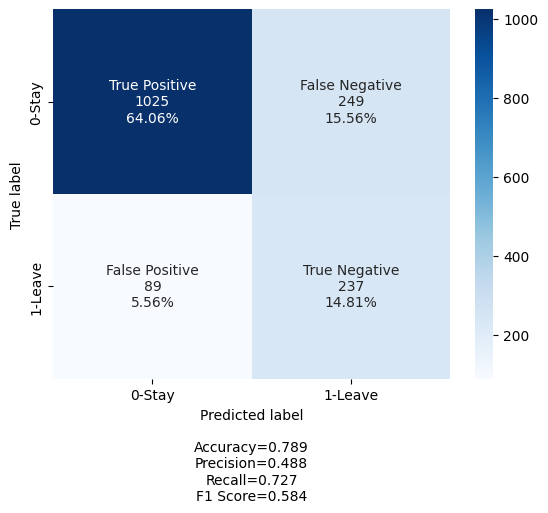

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred6)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

Using keras tuner has returned parameters with the highest recall to this point.


Will try this model with SMOTE


**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
y_train.value_counts()

0    5096
1    1304
Name: Exited, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample=SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train_over.value_counts()

0    5096
1    5096
Name: Exited, dtype: int64

## Build a model with Balanced Dataset

In [ ]:
# clear keras backend between model fitting
backend.clear_session()
# set the seed for random generators to ensure the same output every run
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model7 = Sequential()
model7.add(Dense(192, activation='relu', input_dim=8))
model7.add(Dropout(0.1))
model7.add(Dense(192, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dense(1, activation='sigmoid'))

#compile model
optimizer =tf.keras.optimizers.SGD(0.001)
model7.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
# fit the model, added early stopping ## switched validation data to the val set because train is oversampled
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history7 = model7.fit(X_train_over, y_train_over, validation_data=(X_val,y_val),
                      epochs=100, batch_size=32,callbacks=es_cb)

Epoch 1/100
319/319 [==============================] - 4s 10ms/step - loss: 0.5054 - recall: 0.7520 - val_loss: 0.5041 - val_recall: 0.7117
Epoch 2/100
319/319 [==============================] - 3s 9ms/step - loss: 0.4598 - recall: 0.7655 - val_loss: 0.4239 - val_recall: 0.6871
Epoch 3/100
319/319 [==============================] - 3s 9ms/step - loss: 0.4499 - recall: 0.7788 - val_loss: 0.4364 - val_recall: 0.7117
Epoch 4/100
319/319 [==============================] - 3s 10ms/step - loss: 0.4429 - recall: 0.7800 - val_loss: 0.4157 - val_recall: 0.7055
Epoch 5/100
319/319 [==============================] - 3s 11ms/step - loss: 0.4371 - recall: 0.7869 - val_loss: 0.4380 - val_recall: 0.7209
Epoch 6/100
319/319 [==============================] - 4s 13ms/step - loss: 0.4303 - recall: 0.7865 - val_loss: 0.4150 - val_recall: 0.7025
Epoch 7/100
319/319 [==============================] - 3s 10ms/step - loss: 0.4240 - recall: 0.7936 - val_loss: 0.4263 - val_recall: 0.7086
Epoch 8/100
319/319 [=

Plotting the validation and training loss

50/50 [==============================] - 0s 5ms/step - loss: 0.4281 - recall: 0.7331
[0.428064227104187, 0.7331288456916809]


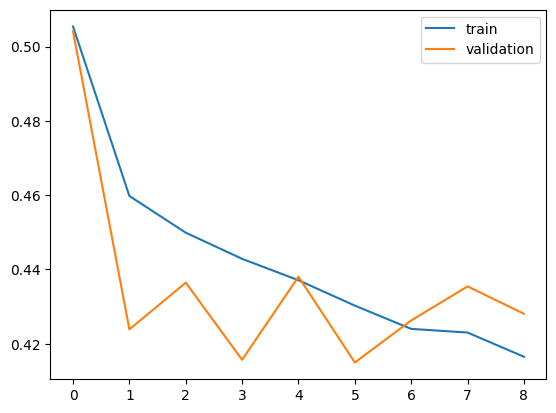

In [ ]:
# capture the learning history per epoch
hist = pd.DataFrame(history7.history)
hist['epoch'] = history7.epoch

# plot the accuracy at each epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train', 'validation'), loc=0)

results = model7.evaluate(X_val, y_val)
print(results)

200/200 [==============================] - 1s 3ms/step
Best Threshold=0.491109, G-Mean=0.802


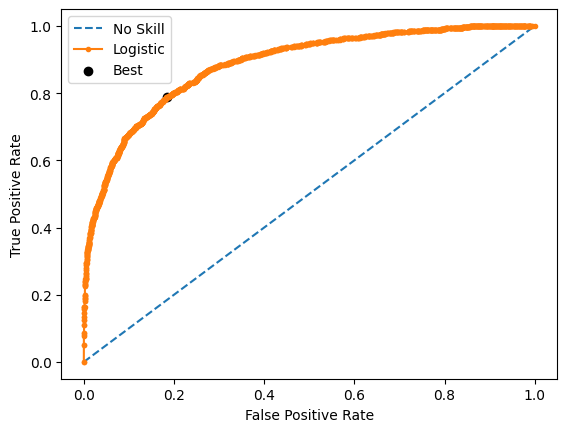

In [ ]:
# predict probabilities
yhat = model7.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred7 = model7.predict(X_val)
y_pred7 = (y_pred7 >thresholds[ix])

50/50 [==============================] - 0s 4ms/step


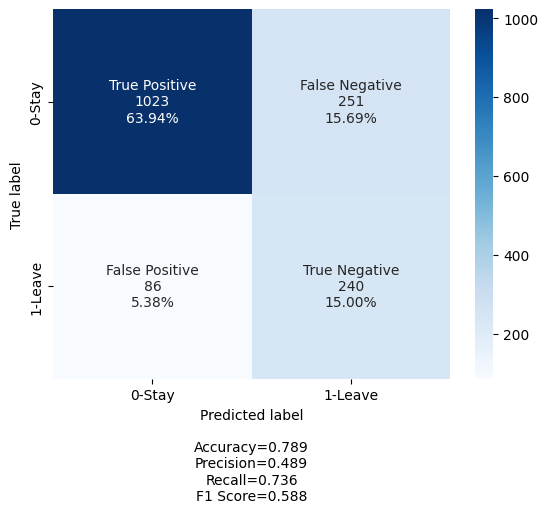

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_val, y_pred7)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

Using SMOTE caused a slight decrease in performance.

Model 6 performed the best.  Will now use model 6 on the Test Data

200/200 [==============================] - 1s 3ms/step
Best Threshold=0.177398, G-Mean=0.798


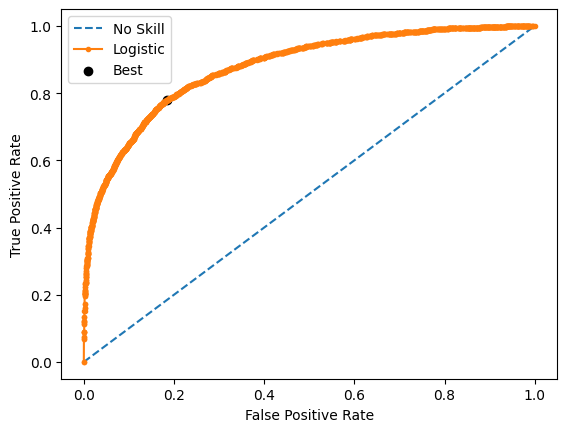

In [ ]:
# predict probabilities
yhat = model6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_pred6_final = model6.predict(X_test)
y_pred6_final = (y_pred6_final >thresholds[ix])

63/63 [==============================] - 1s 6ms/step


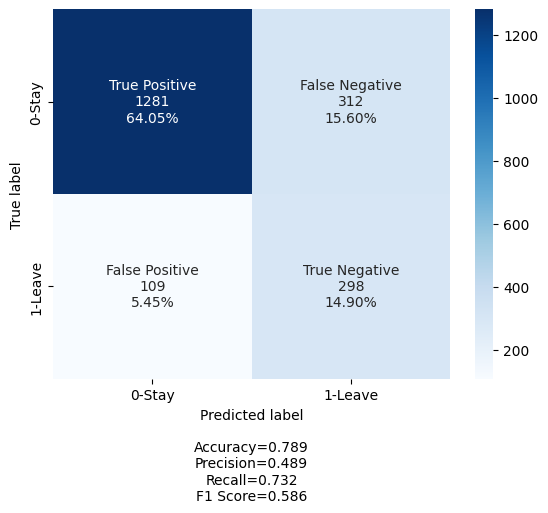

In [ ]:
# calculating the confusion matrix using scikit learn's cm
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_test, y_pred6_final)
labels = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
categories = ['0-Stay', '1-Leave']
make_confusion_matrix(cm,
                      group_names = labels,
                      categories = categories,
                      cmap='Blues')

## Actionable Insights and Recommendations

---



Oversampling using SMOTE did not help with this dataset.

Overall, model6, the one tuned with Keras Tuner performed the best, but others were similar.

Predicting with model 6 on the Test Data, there were 97 false positives, these are customers that the model said would stay, but they actually left.

For this situation, we want to limit this number. It is better to identify those that have potential to leave, and focus retainment efforts on them.

Additionally, as discovered during exploritory data analysis, all of the clients with four products left the bank.  This is interesting, and points out that perhaps we need to focus on our clients with numerous products.

### Business Recommendations

* The bank can deploy the final model from this exercise to identify, with a reasonable degree of accuracy, whether an customer is likely to leave or not, and this process seems to be easier and more time-efficient than other methods.

* Customers in Germany are more likely to leave the bank, so start with focused retention efforts there.

* Additionally, customers that are not currently acive have a higher likelihood of leaving the bank, so work towards customer engagement for those not normally active.

In [ ]:
# tone generator, run this cell last, and when it is complete,
#it will make a sound to alert you the notbook has completed running
from IPython.lib.display import Audio

framerate = 4410
play_time_seconds = 1

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)
Audio(audio_data, rate=framerate, autoplay=True)

In [ ]:
# weighting method shared by Alex on the MLS.  Much better performance ~91% recall

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Assuming you already have X_train and y_train defined
# Replace the placeholders 'X_train' and 'y_train' with your actual train data and labels

# Calculate class weights based on the class frequencies in the training data
class_weights = dict(zip(*np.unique(y_train, return_counts=True)))
total_samples = len(y_train)
for class_label, count in class_weights.items():
    class_weights[class_label] = total_samples / (len(class_weights) * count)

print(class_weights)

# reset randoms
reset_random()

# build model from paramaters found in grid search
model_weighted = two_layer_model(**{key: value for key, value in grid_result.best_params_.items() if key != 'batch_size'})

# Compile the model with class weights
model_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history_weighted = model_weighted.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, batch_size=grid_result.best_params_['batch_size'], callbacks=[early_stop])